# Shopping Basket Recommendation System with Python


# Python을 이용한 장바구니 추천 시스템

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

장바구니에는 기본적으로 사람이 구매한 아이템 목록이 포함되어 있습니다. 이러한 데이터는 어떤 제품이 수요가 있는지, 어떤 제품이 계절적 상품인지 등과 같은 정보를 나타낼 것이기 때문에 상점에 매우 유용할 정보가 될수 있습니다. 기업은 어떠한 상품에 초점을 맞춰야 하는지 파악하고 이를 바탕으로 추천할 수 있습니다. 장바구니 추천은 AI를 이용해 한 사람의 쇼핑 리스트를 연구해 그 사람에게 구매할 가능성이 있는 물건을 제안할 수 있습니다.

이 노트북에서는 KNN 모델을 사용한 장바구니 추천 시스템에 중점을 둘 것입니다.

## Context

[Kaggle](https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews/data?select=ratings_Electronics+%281%29.csv)에서 가져온 Amazon 제품 리뷰를 사용하여 작업합니다. Kaggle은 데이터 전문가들이 모여 지식을 공유하고 서로 경쟁하여 보상을 받을 수 있는 데이터 공유 플랫폼입니다.

## 고객 리뷰 데이터

Amazon, Walmart와 같은 대형 전자 상거래 회사는 매일 수백만 명의 고객과 거래합니다. 고객은 제품을 검색하고 구매하고 때로는 리뷰를 남깁니다. 이를 감안할 때 고객은 전자 상거래 회사에게 가장 중요한 요소입니다: 그들을 지속적으로 만족시켜야 합니다.

고객의 쇼핑 이력, 즉 고객이 무엇을 구매하고 무엇을 선호하는지 알고 있다고 상상해 보십시오. 당신은 그들이 미래에 무엇을 사고 싶어할지 예측하고 그러한 것들을 제안함으로써 이 정보를 당신에게 유리하게 사용할 수 있습니다.

### Side note: KNN 이란?

KNN(K-Nearest Neighbors)은 분류와 회귀에 모두 사용되는 알고리즘입니다. KNN 알고리즘은 '유유상종'이라는 말처럼 주변에 비슷한 것이 존재한다고 가정합니다. KNN 알고리즘은 가장 가까운 이웃의 클래스, 특히 k 수를 기반으로 새 데이터 포인트를 분류합니다. k는 객체의 클래스를 결정하는 데 도움이 되는 가장 가까운 이웃의 수를 나타냅니다. 다음 다이어그램에서 명확하게 확인할 수 있습니다.

![Knn where k = 3](https://cambridgecoding.files.wordpress.com/2016/01/knn2.jpg)

## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다. Matplotlib은 고품질의 데이터 시각화를 위한 Python의 2차원 그래프 라이브러리입니다. 코드 몇 줄만으로 간단하게 복잡한 그래프를 만들 수 있어서 사용성이 매우 높습니다.

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
%matplotlib inline

이제 라이브러리를 가져왔으므로 csv 파일을 읽어오겠습니다.

In [2]:
electronics_data=pd.read_csv(r"[Dataset]_Module11_(Recommendation).csv",names=['userId', 'productId','Rating','timestamp'])

데이터가 어떻게 구성되었는지 살펴보겠습니다.

In [3]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### Task 1: electronic data의 첫 20 행 표시

In [4]:
#your code here
electronics_data.head(20)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


## 데이터셋에 대한 정보 얻기

데이터 세트에 대한 다양한 정보를 수집할 수 있다면 데이터 세트에 대한 명확한 그림을 제공하고, 데이터를 처리하는 데 도움이 될 것입니다.

In [5]:
# 데이터의 행과 열의 갯수
electronics_data.shape

(7824482, 4)

In [6]:
# 데이터의 행과 열의 이름을 리스트로 반환
electronics_data.axes

[RangeIndex(start=0, stop=7824482, step=1),
 Index(['userId', 'productId', 'Rating', 'timestamp'], dtype='object')]

In [7]:
# 데이터 세트의 하위 집합 가져오기
electronics_data=electronics_data.iloc[:1048576,0:]

In [8]:
# 데이터 타입 확인
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [9]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048576 non-null  object 
 1   productId  1048576 non-null  object 
 2   Rating     1048576 non-null  float64
 3   timestamp  1048576 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [10]:
electronics_data.index

RangeIndex(start=0, stop=1048576, step=1)

In [11]:
electronics_data.columns

Index(['userId', 'productId', 'Rating', 'timestamp'], dtype='object')

In [12]:
electronics_data.describe()['timestamp'].T

count    1.048576e+06
mean     1.248822e+09
std      1.091615e+08
min      9.127296e+08
25%      1.169078e+09
50%      1.250035e+09
75%      1.355789e+09
max      1.406074e+09
Name: timestamp, dtype: float64

### Task 2: 데이터 세트의 Rating 열에 대한 정보 표시

In [13]:
#yourcodehere
electronics_data.describe()['Rating'].T

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [14]:
# 등급이 1-5 척도인지 1-10 척도인지 알아보기 위해 최소 및 최대 등급을 찾아보겠습니다.
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


### Task 3: 데이터 세트에서 누락된 값 확인


In [15]:
# 데이터세트에서 누락된 값을 확인하겠습니다.
#yourcodehere
electronics_data.isna()

,userId,productId,Rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1048571,False,False,False,False
1048572,False,False,False,False
1048573,False,False,False,False
1048574,False,False,False,False


In [16]:
electronics_data.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

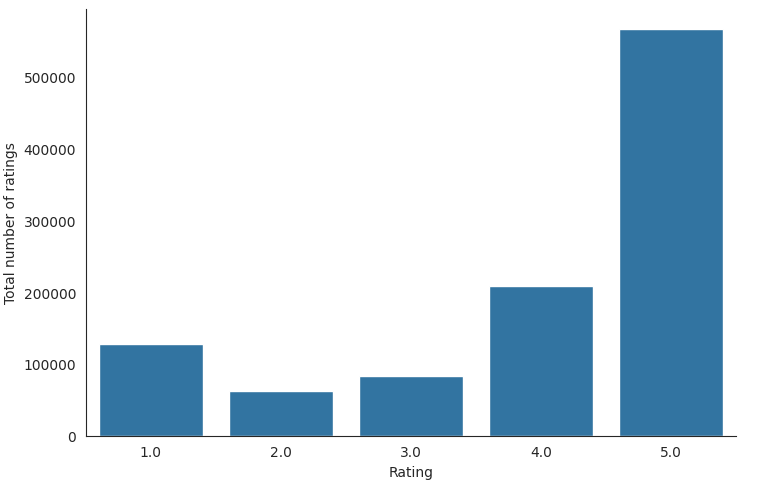

In [17]:
# 막대 그래프를 이용하여 다양한 등급 분포를 알아보겠습니다.
with sns.axes_style('white'):
    g = sns.catplot(x="Rating", data=electronics_data, aspect=1.5,kind='count') #count는 각 Rating 값의 개수 
    g.set_ylabels("Total number of ratings")

In [18]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.userId)))
print("Total No of products  :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


## 관심 있는 데이터 세트만 선택합니다. 

때로는 추정을 위해 모든 데이터 세트가 필요하지는 않습니다. 데이터의 모든 속성이 우리가 구축하는 모델에 유용한 것은 아닙니다. 이 경우 해당 속성을 안전하게 삭제할 수 있습니다. 예를 들어, 사용자가 구매하고 싶어할 수 있는 제품을 추천하는 데 timestamp 열은 어떠한 도움도 주지 않기 때문에 여기에서는 삭제할 수 있습니다.

In [19]:
# timestamp 열은 필요하지 않으므로 삭제합니다.
electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [20]:
# 구매 고객이 부여한 평가를 분석해 보겠습니다.

ratings_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

ratings_per_user.head()

userId
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

## 분위수 분포 보기

분위수는 샘플을 동일한 크기의 그룹으로 나누는 지점입니다. 정렬된 데이터 집합의 중앙값은 해당 집합의 중간 지점으로 정렬은 오름차순 또는 내림차순으로 정렬됨을 의미합니다. 따라서 중앙값은 데이터 세트를 2개의 동일한 그룹으로 나눌 때 분위수입니다.

![중앙값(분위수 예제)](https://www.statisticshowto.com/wp-content/uploads/2013/09/median.png)

In [21]:
quantiles = ratings_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

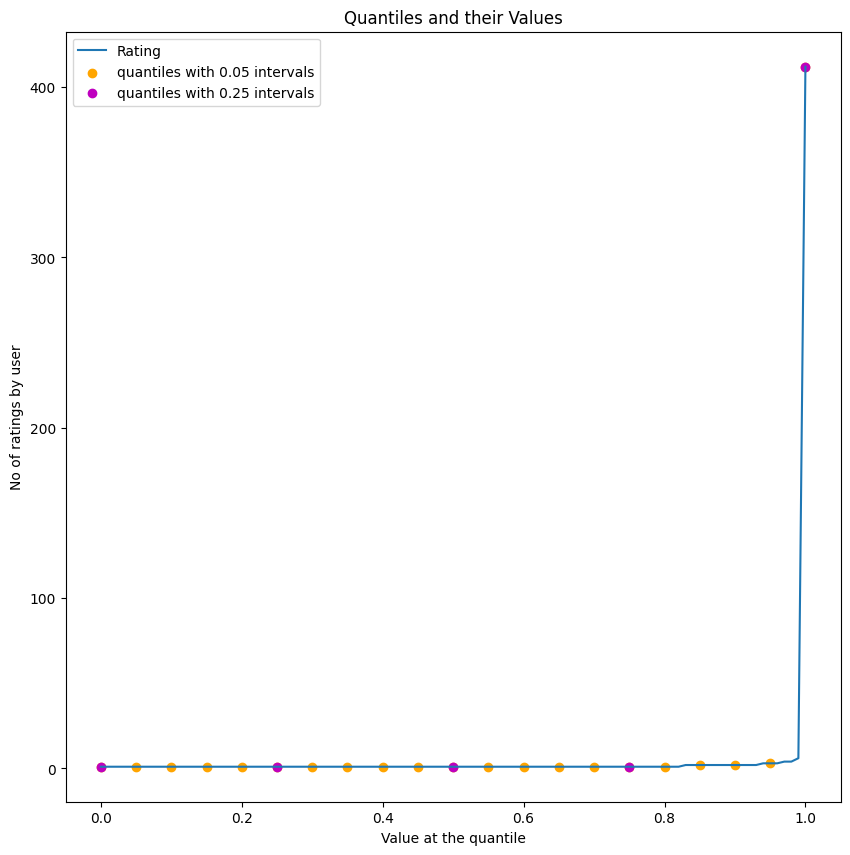

In [22]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# 차이가 0.05인 분위수를 찾습니다.
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# 차이가 0.25인 분위수도 구해 보겠습니다.
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

50개 이상의 제품을 평가한 유저 수 계산

In [23]:
print('\n Number of users who rated more than 50 products : {}\n'.format(sum(ratings_per_user >= 50)) )



 Number of users who rated more than 50 products : 38



### Task 4: 60개 이상의 제품을 평가한 유저 수 계산

In [24]:
#yourcodehere
print('\n Number of users who rated more than 60 products : {}\n'.format(sum(ratings_per_user >= 60)) )


 Number of users who rated more than 60 products : 30



## 인기도에 따라 최종 작업 데이터 세트 가져오기

KNN 기능이 있는 Surprise 라이브러리를 import 시킵니다. 인기가 적은 상품은 추천에 크게 영향을 주지 않기 때문에 어떤 상품이 사용자에게 정말 인기가 있는지 확인하고 새로운 상품을 추천할 때 사용합니다.

라이브러리가 설치되어 있지 않은 경우 터미널에서 다음 단계를 수행하십시오. <br>
pip install surprise

In [25]:
import surprise
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [26]:
# 인기 기반
# productId 별로 그룹화를 한 후, 각 제품에 대한 리뷰의 개수(Rating의 개수)가 
# 50개 이상인 제품들만 필터링하여 new_df라는 새로운 데이터프레임을 생성
# 각 제품(productId)이 최소 50개 이상의 평가(Rating)를 받은 경우만 필터링하여 새로운 데이터프레임에 저장합니다. 
# 새로운 데이터 프레임에 평점 60점 이상 받은 고객들을 포함하는 경우도 테스트해 보세요.

new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)

In [27]:
# 데이터 세트를 읽어 옵니다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [28]:
# 데이터 세트를 훈련과 테스트 데이터로 분할합니다.
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [29]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [30]:
# 테스트 세트에 대해 훈련된 모델을 실행해 보겠습니다.
test_pred = algo.test(testset)

## Getting accuracy

정확도

기계 학습 알고리즘의 정확도는 알고리즘이 얼마나 잘 수행되고 있는지, 즉 알고리즘이 데이터 포인트를 올바르게 분류하는 빈도를 측정하는 것입니다. 정확도는 다음과 같이 주어집니다:

![정확도](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)

상관 행렬

상관 행렬은 변수 간의 관계, 즉 다른 변수가 변경될 때 한 변수가 어떻게 변경되는지를 보여주는 테이블입니다. 5개의 변수가 있는 경우 상관 행렬에는 5 곱하기 5 또는 25개의 항목이 있으며 각 항목은 두 변수 간의 상관 관계를 보여줍니다.

RMSE

RMSE는 평균 제곱근 오차를 나타냅니다. 기계 학습 모델을 사용하여 예측을 수행할 때 예측이 정확한지 확인해야 합니다. RMSE는 예측 오류를 측정하는 방법입니다. RMSE가 높으면 예측이 나쁘고, 낮으면 예측이 좋은 것입니다.

In [31]:
# RMSE를 구합니다.
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3436


1.343641161111319

Our final goal is to get a model that can predict. We could use existing user-item interactions to train a model to predict the top-5 items that might be the most suitable for a user. We will take the top 10000 recommendations and use an SVD to get the model.
우리의 최종 목표는 예측 모델을 얻는 것입니다. 기존 사용자-항목 상호 작용을 이용하여 사용자에게 가장 적합할 수 있는 상위 5개 항목을 예측하도록 모델을 훈련할 수 있습니다. 상위 10000개의 추천 항목과 SVD 알고리즘을 사용하는 모델을 사용하겠습니다.

In [32]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0293130VTX2ZXA70JQS,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A030530627MK66BD8V4LN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0571176384K8RBNKGF8O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

상관 행렬을 찾습니다.

In [48]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

ID가 "B00000K135"인 책을 고려하고 있다고 가정합니다. 우리는 이 책을 사는 고객을 찾아서 다른 책을 추천해 줄  것입니다.

In [36]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

"B00000K135" 항목을 구매하는 고객에게 추천해야 할 주요 품목입니다.

In [37]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
Recommend = list(X.index[correlation_product_ID > 0.65])
# 고객이 이미 구매한 항목을 제거합니다.
Recommend.remove(i) 
# 추천 항목을 출력합니다.
Recommend[0:24]

['1400501466',
 '1400501520',
 '1400501776',
 '1400532736',
 '1400599997',
 '1400698987',
 '9985511476',
 'B00000IGBF',
 'B00000J0D5',
 'B00000J1EP',
 'B00000J1F3',
 'B00000J1TX',
 'B00000J3NF',
 'B00000J434',
 'B00000J4EY',
 'B00000J4FS',
 'B00000J4GE',
 'B00000JCTO',
 'B00000JFMK',
 'B00000JII6',
 'B00000JYWQ']

### Task 5: 아이템 'B00000JSGF' 구매 고객을 위한 추천 항목 표시하기

In [50]:
#yourcodehere
i2 = "B00000JSGF"

product_names2 = list(X.index)
product_ID2 = product_names2.index(i2)
product_ID2

correlation_product_ID2 = correlation_matrix[product_ID2]
correlation_product_ID2.shape
Recommend = list(X.index[correlation_product_ID2 > 0.65])
# 고객이 이미 구매한 항목을 제거합니다.
Recommend.remove(i2) 
# 추천 항목을 출력합니다.
Recommend[0:24]

['3744295508',
 '6301977173',
 '7214047977',
 '9573212919',
 '9625993428',
 '9888002198',
 'B000001OM5',
 'B00000J05A',
 'B00000J0D2',
 'B00000J0D8',
 'B00000J1U8',
 'B00000J1UQ',
 'B00000J1V3',
 'B00000J3UJ',
 'B00000J6WY',
 'B00000JBHP',
 'B00000JCT8',
 'B00000JD34',
 'B00000JDHV',
 'B00000JFIF',
 'B00000JHWX',
 'B00000JPPI',
 'B00000JYLO']


### Task 6: 아이템 'B00000JDF6' 구매 고객을 위한 추천 항목 표시하기

In [49]:
#yourcodehere
i3 = "B00000JDF6"

product_names3 = list(X.index)
product_ID3 = product_names3.index(i3)
product_ID3

correlation_product_ID3 = correlation_matrix[product_ID3]
correlation_product_ID3.shape
Recommend = list(X.index[correlation_product_ID3 > 0.65])
# 고객이 이미 구매한 항목을 제거합니다.
Recommend.remove(i3) 
# 추천 항목을 출력합니다.
Recommend[0:24]

[]

### Conclusion

인공 지능은 다양한 현대 산업에서 문제를 해결하는 데 널리 사용됩니다. 여기, 이 노트북에서 우리는 쇼핑 습관을 기반으로 고객에게 상품을 추천함으로써 전자 상거래 산업에서 인공 지능이 어떻게 사용될 수 있는지에 대한 예를 보았습니다.